# Correlations between the crops

## Permanent Crops

### Heatmap

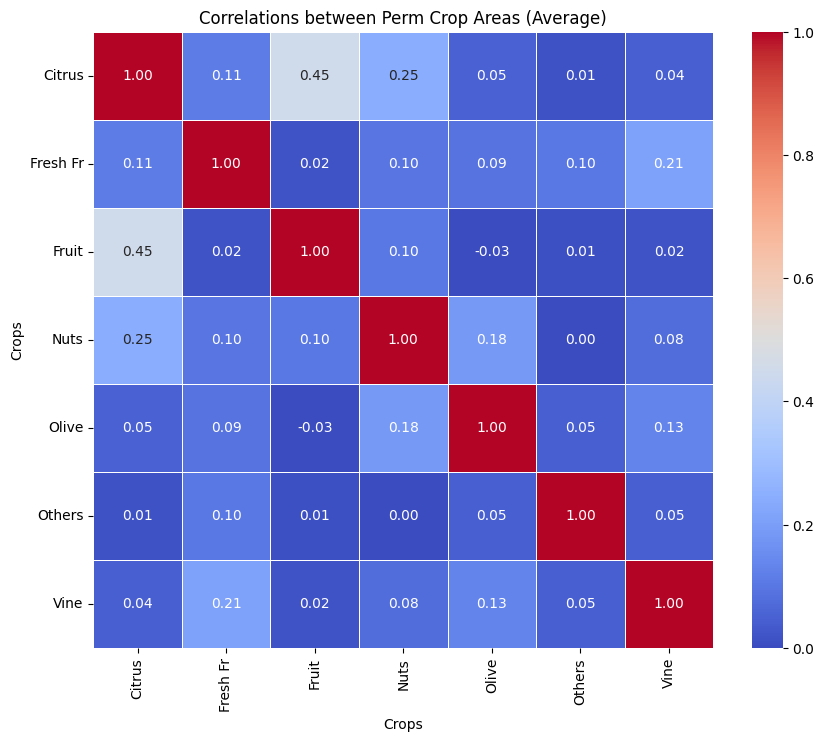

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Dictionary to map crop names to abbreviations
crop_abbreviation_dict = {
    'Olive plantations': 'Olive',
    'Vineyards': 'Vine',
    'Fresh fruit plantations (excluding citrus plantations)': 'Fresh Fr',
    'Nuts plantations': 'Nuts',
    'Citrus plantations': 'Citrus',
    'Fruit plantations (subtropical climate zones)': 'Fruit',
    'Other permanent crops': 'Others'
}

# Load the data from a CSV file
df = pd.read_csv('3_perm_crops.csv')

# Calculate the average of the area values for each region and crop
crop_data = df[['region_name', 'Perm_crop', 'Area_1989', 'Area_1999', 'Area_2009', 'Area_2019']].dropna()
crop_data['Average_Area'] = crop_data[['Area_1989', 'Area_1999', 'Area_2009', 'Area_2019']].mean(axis=1)

# Pivot the DataFrame to have crop areas as columns
crop_pivot = crop_data.pivot_table(index='region_name', columns='Perm_crop', values='Average_Area', aggfunc='sum')

# Rename the crop labels using the abbreviation dictionary
crop_pivot.columns = [crop_abbreviation_dict.get(crop, crop) for crop in crop_pivot.columns]

# Calculate the correlations between crop areas
crop_correlations = crop_pivot.corr()

# Create a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(crop_correlations, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, vmin=0, vmax=1)
plt.title('Correlations between Perm Crop Areas (Average)')
plt.xlabel('Crops')
plt.ylabel('Crops')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()


### Sorted list

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from prettytable import PrettyTable

# Load the data from a CSV file
df = pd.read_csv('3_perm_crops.csv')

# Calculate the average of the area values for each region and crop
crop_data = df[['region_name', 'Perm_crop', 'Area_1989', 'Area_1999', 'Area_2009', 'Area_2019']].dropna()
crop_data['Average_Area'] = crop_data[['Area_1989', 'Area_1999', 'Area_2009', 'Area_2019']].mean(axis=1)

# Pivot the DataFrame to have crop areas as columns
crop_pivot = crop_data.pivot_table(index='region_name', columns='Perm_crop', values='Average_Area', aggfunc='sum')

# Calculate the correlations between crop areas
crop_correlations = crop_pivot.corr()

# Remove self-correlations
crop_correlations = crop_correlations.mask(pd.DataFrame(np.eye(crop_correlations.shape[0], dtype=bool), crop_correlations.index, crop_correlations.columns))

# Sort the correlations in descending order
sorted_correlations = crop_correlations.unstack().sort_values(ascending=False)

# Drop NaN values
sorted_correlations = sorted_correlations.dropna()

# Create a DataFrame for the sorted correlations
correlation_table = pd.DataFrame(sorted_correlations, columns=['Correlation'])

# Drop duplicate values
correlation_table = correlation_table[~correlation_table['Correlation'].duplicated()]

# Create a PrettyTable instance
table = PrettyTable()
table.field_names = ['Perm Crop 1', 'Perm Crop 2', 'Correlation']

# Add rows to the table
for index, row in correlation_table.iterrows():
    crop1, crop2 = index
    correlation = "{:.3f}".format(row['Correlation'])  # Format correlation to 3 decimal places
    table.add_row([crop1, crop2, correlation])

# Set column alignments
table.align['Perm Crop 1'] = 'l'
table.align['Perm Crop 2'] = 'l'
table.align['Correlation'] = 'r'

# Display the formatted table
print(table)

+--------------------------------------------------------+--------------------------------------------------------+-------------+
| Perm Crop 1                                            | Perm Crop 2                                            | Correlation |
+--------------------------------------------------------+--------------------------------------------------------+-------------+
| Citrus plantations                                     | Fruit plantations (subtropical climate zones)          |       0.452 |
| Citrus plantations                                     | Nuts plantations                                       |       0.246 |
| Fresh fruit plantations (excluding citrus plantations) | Vineyards                                              |       0.208 |
| Nuts plantations                                       | Olive plantations                                      |       0.184 |
| Vineyards                                              | Olive plantations              

## Temporary Crops

### Heatmap

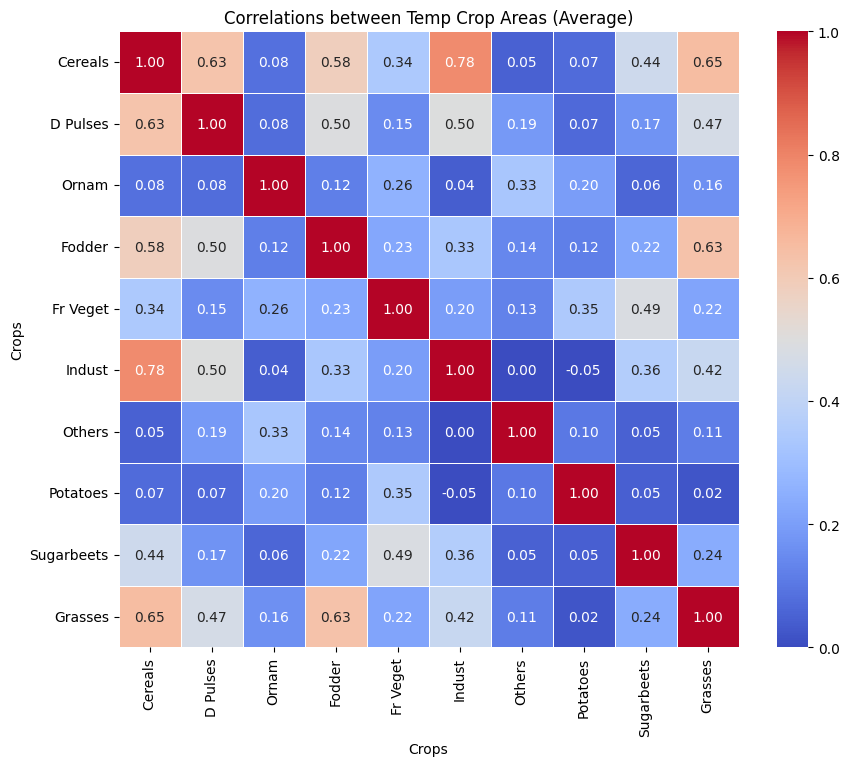

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Dictionary to map crop names to abbreviations
crop_abbreviation_dict = {
    'Cereals': 'Cereals',
    'Fodder plants': 'Fodder',
    'Potatoes': 'Potatoes',
    'Dried pulses': 'D Pulses',
    'Temporary grasses and grazings': 'Grasses',
    'Industrial crops': 'Indust',
    'Fresh vegetables': 'Fr Veget',
    'Other temporary crops': 'Others',
    'Flowers and ornamental plants': 'Ornam',
    'Sugarbeets': 'Sugarbeets'
}

# Load the data from a CSV file
df = pd.read_csv('3_temp_crops.csv')

# Calculate the average of the area values for each region and crop
crop_data = df[['region_name', 'Temp_crop', 'Area_1989', 'Area_1999', 'Area_2009', 'Area_2019']].dropna()
crop_data['Average_Area'] = crop_data[['Area_1989', 'Area_1999', 'Area_2009', 'Area_2019']].mean(axis=1)

# Pivot the DataFrame to have crop areas as columns
crop_pivot = crop_data.pivot_table(index='region_name', columns='Temp_crop', values='Average_Area', aggfunc='sum')

# Rename the crop labels using the abbreviation dictionary
crop_pivot.columns = [crop_abbreviation_dict.get(crop, crop) for crop in crop_pivot.columns]

# Calculate the correlations between crop areas
crop_correlations = crop_pivot.corr()

# Create a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(crop_correlations, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, vmin=0, vmax=1)
plt.title('Correlations between Temp Crop Areas (Average)')
plt.xlabel('Crops')
plt.ylabel('Crops')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()


### Sorted list

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from prettytable import PrettyTable

# Load the data from a CSV file
df = pd.read_csv('3_temp_crops.csv')

# Calculate the average of the area values for each region and crop
crop_data = df[['region_name', 'Temp_crop', 'Area_1989', 'Area_1999', 'Area_2009', 'Area_2019']].dropna()
crop_data['Average_Area'] = crop_data[['Area_1989', 'Area_1999', 'Area_2009', 'Area_2019']].mean(axis=1)

# Pivot the DataFrame to have crop areas as columns
crop_pivot = crop_data.pivot_table(index='region_name', columns='Temp_crop', values='Average_Area', aggfunc='sum')

# Calculate the correlations between crop areas
crop_correlations = crop_pivot.corr()

# Remove self-correlations
crop_correlations = crop_correlations.mask(pd.DataFrame(np.eye(crop_correlations.shape[0], dtype=bool), crop_correlations.index, crop_correlations.columns))

# Sort the correlations in descending order
sorted_correlations = crop_correlations.unstack().sort_values(ascending=False)

# Drop NaN values
sorted_correlations = sorted_correlations.dropna()

# Create a DataFrame for the sorted correlations
correlation_table = pd.DataFrame(sorted_correlations, columns=['Correlation'])

# Drop duplicate values
correlation_table = correlation_table[~correlation_table['Correlation'].duplicated()]

# Create a PrettyTable instance
table = PrettyTable()
table.field_names = ['Temp Crop 1', 'Temp Crop 2', 'Correlation']

# Add rows to the table
for index, row in correlation_table.iterrows():
    crop1, crop2 = index
    correlation = "{:.3f}".format(row['Correlation'])  # Format correlation to 3 decimal places
    table.add_row([crop1, crop2, correlation])

# Set column alignments
table.align['Temp Crop 1'] = 'l'
table.align['Temp Crop 2'] = 'l'
table.align['Correlation'] = 'r'

# Display the formatted table
print(table)



+--------------------------------+--------------------------------+-------------+
| Temp Crop 1                    | Temp Crop 2                    | Correlation |
+--------------------------------+--------------------------------+-------------+
| Industrial crops               | Cereals                        |       0.784 |
| Cereals                        | Temporary grasses and grazings |       0.651 |
| Temporary grasses and grazings | Fodder plants                  |       0.632 |
| Dried pulses                   | Cereals                        |       0.627 |
| Cereals                        | Fodder plants                  |       0.583 |
| Industrial crops               | Dried pulses                   |       0.498 |
| Dried pulses                   | Fodder plants                  |       0.496 |
| Sugarbeets                     | Fresh vegetables               |       0.488 |
| Temporary grasses and grazings | Dried pulses                   |       0.465 |
| Cereals       

# Correlation between Permanent and Temporary crops

### Not working correctly

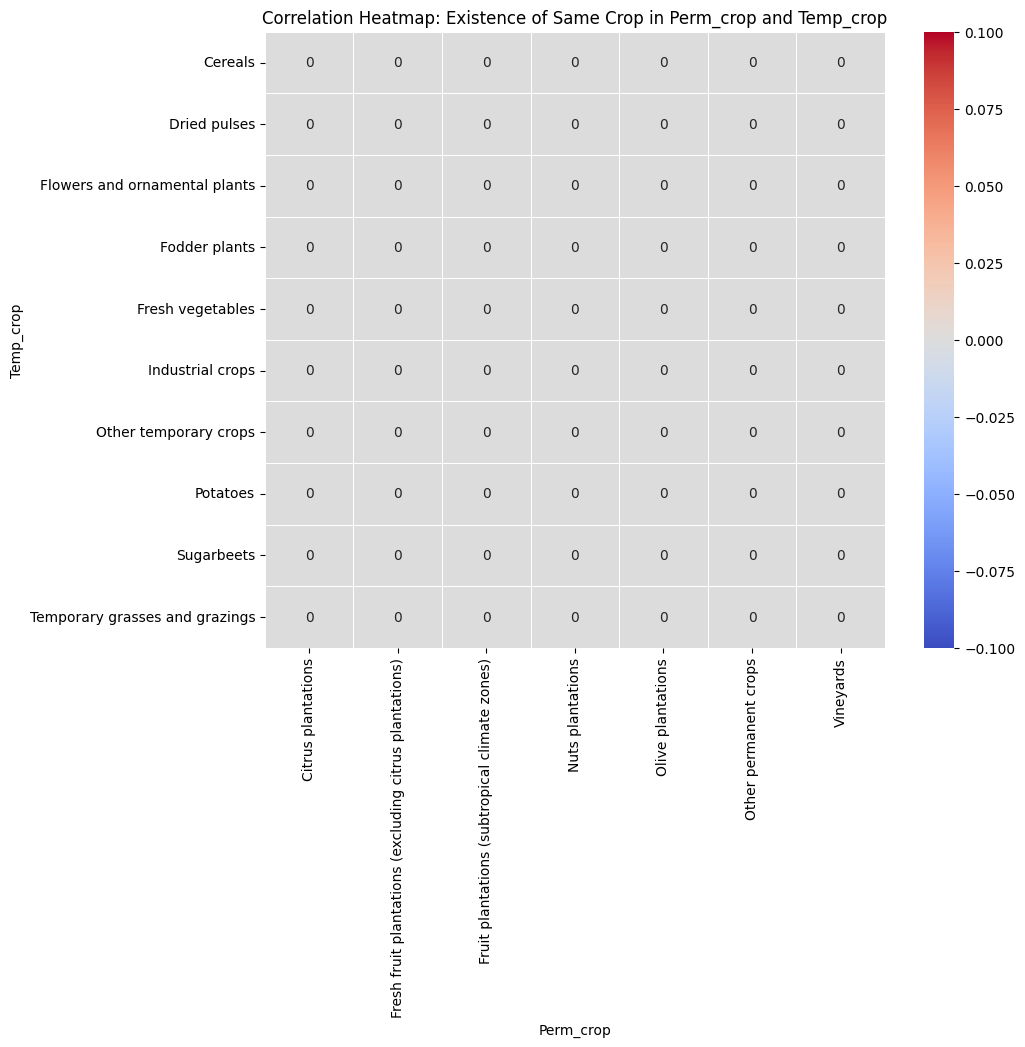

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from the first CSV file
df1 = pd.read_csv('3_temp_crops.csv')

# Load the data from the second CSV file
df2 = pd.read_csv('3_perm_crops.csv')

# Extract the relevant columns from both dataframes
df1_subset = df1[['region_name', 'Temp_crop', 'Area_1989', 'Area_1999', 'Area_2009', 'Area_2019']].dropna()
df2_subset = df2[['region_name', 'Perm_crop', 'Area_1989', 'Area_1999', 'Area_2009', 'Area_2019']].dropna()


df1_subset['Average_Area1'] = df1_subset[['Area_1989', 'Area_1999', 'Area_2009', 'Area_2019']].mean(axis=1)
df2_subset['Average_Area2'] = df2_subset[['Area_1989', 'Area_1999', 'Area_2009', 'Area_2019']].mean(axis=1)


# Merge the two dataframes based on the 'region_name' column
merged_df = pd.merge(df1_subset, df2_subset, on='region_name', how='outer')

# Create a new column indicating if the region has the same crop in Temp_crop and Perm_crop
merged_df['Same_Crop'] = merged_df['Temp_crop'] == merged_df['Perm_crop']

# Pivot the dataframe to get the count of Same_Crop occurrences
pivot_table = merged_df.pivot_table(index='Temp_crop', columns='Perm_crop', values='Same_Crop', aggfunc='sum', fill_value=0)


# Pivot the DataFrame to have crop areas as columns
crop_pivot = crop_data.pivot_table(index='region_name', columns='Temp_crop', values='Average_Area', aggfunc='sum')

# Calculate the correlations between crop areas
crop_correlations = crop_pivot.corr()



# Create a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt=".0f", linewidths=0.5)
plt.title('Correlation Heatmap: Existence of Same Crop in Perm_crop and Temp_crop')
plt.xlabel('Perm_crop')
plt.ylabel('Temp_crop')
plt.show()

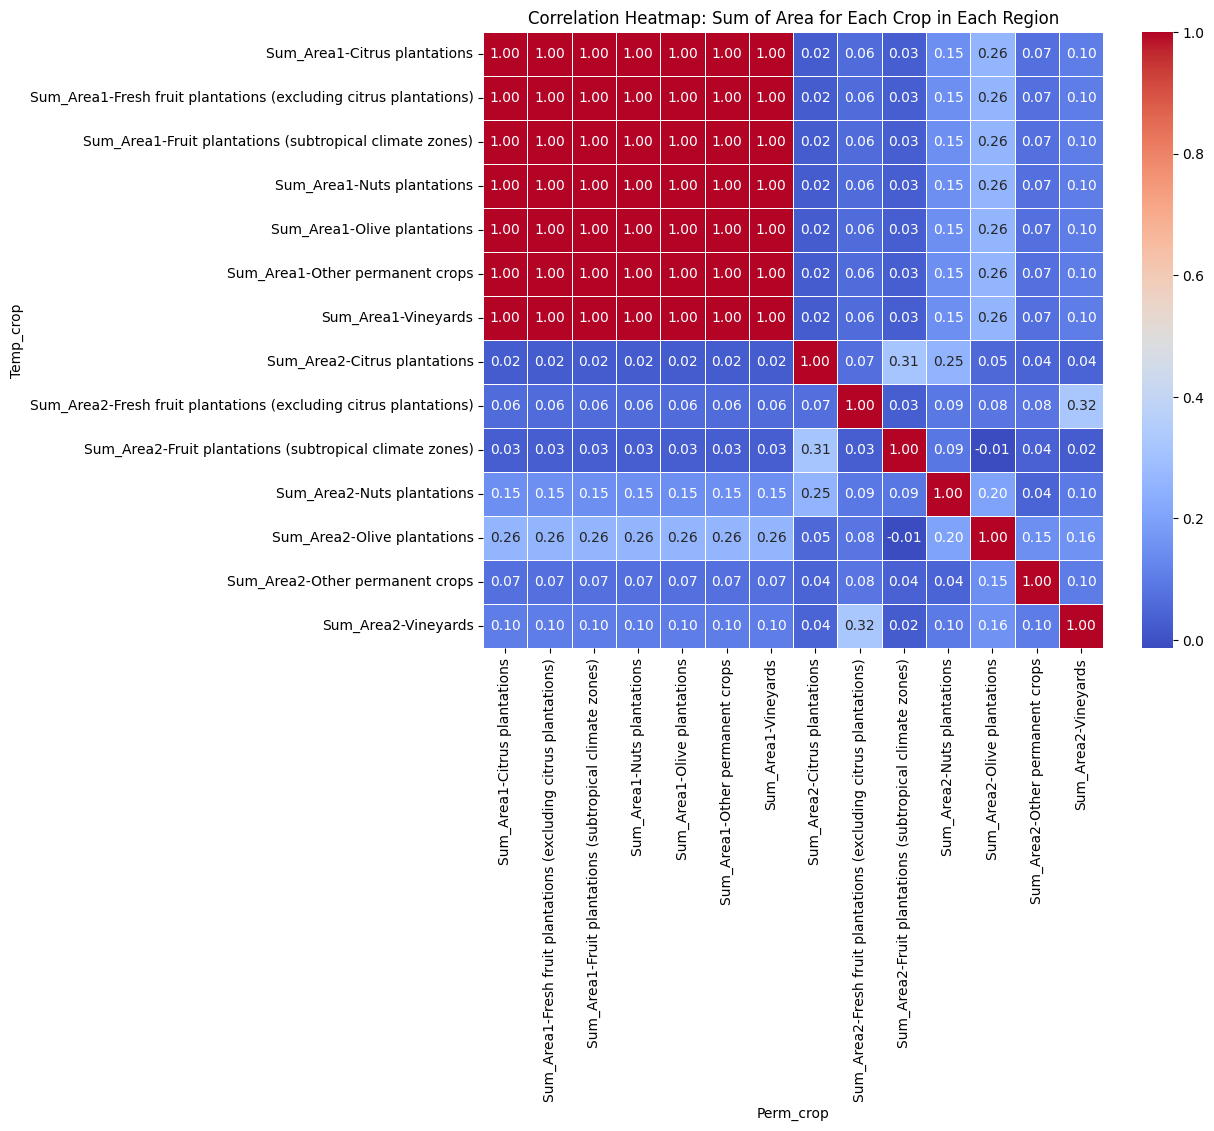

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from the first CSV file
df1 = pd.read_csv('3_temp_crops.csv')

# Load the data from the second CSV file
df2 = pd.read_csv('3_perm_crops.csv')

# Extract the relevant columns from both dataframes
df1_subset = df1[['region_name', 'Temp_crop', 'Area_1989', 'Area_1999', 'Area_2009', 'Area_2019']].dropna()
df2_subset = df2[['region_name', 'Perm_crop', 'Area_1989', 'Area_1999', 'Area_2009', 'Area_2019']].dropna()

# Calculate the sum of area columns for df1_subset
df1_subset['Sum_Area1'] = df1_subset[['Area_1989', 'Area_1999', 'Area_2009', 'Area_2019']].sum(axis=1)
# Calculate the sum of area columns for df2_subset
df2_subset['Sum_Area2'] = df2_subset[['Area_1989', 'Area_1999', 'Area_2009', 'Area_2019']].sum(axis=1)

# Merge the two dataframes based on the 'region_name' column
merged_df = pd.merge(df1_subset, df2_subset, on='region_name', how='outer')

# Calculate correlations for each crop in each region_name
correlations = merged_df.groupby(['region_name', 'Temp_crop', 'Perm_crop'])[['Sum_Area1', 'Sum_Area2']].sum().unstack().corr()

# Create a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap: Sum of Area for Each Crop in Each Region')
plt.xlabel('Perm_crop')
plt.ylabel('Temp_crop')
plt.show()

